**AUTOENCODERS**



*   Auto Encoders are a type of neural network model that tries to learn from compressed form of data
*   They're mainly used to remove the insignificant parts from the dataset, which in turn helps us from getting tired of training our neural network on the said dataset



In [17]:
#import all the necessary libraries

import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test/255.0 

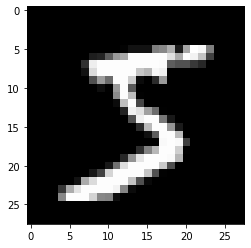

In [18]:
#For the sake of our own understanding, let's see how our dataset actually is

import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray")

##Create Encoder and Decoder separately

In [19]:
#since all the images are of shape (28, 28, 1), we inpuut the same while creating the input layer.
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
#we then create a layer that flattens ourinput image data to mere vectors, since the deep neural network accepts only vectors and tensors.
x = keras.layers.Flatten()(encoder_input)
#we then create a dense later that recieves the flattened input image
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

#the decoder's input is the output of the encoder
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
#although not necessary in this case, an added dense layer usually helps the deep neural models.
#we need 784 nodes to output the ddecoded image. so, if we don't use a dense layer, we can apply the 784 input nodes in the previous layer itself
x = keras.layers.Dense(784, activation="relu")(decoder_input)
#reshapee the vector to output in image format
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

In [20]:
#optimizer is initialised to use in the autoencoder while compiling the model. we can use any optimizer, but adam is the most commonly used one.
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
#create the autoencoder from the encoder's and decoder's inputs and outputs respectively
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [21]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________

In [22]:
#compile the model with the above initialised optimiser and mean squared loss
autoencoder.compile(opt, loss='mse')

In [32]:
#fit the data to train our model
epochs=3

for epoch in range(epochs):

    history = autoencoder.fit(
      x_train,
      x_train,
      epochs=1, 
      batch_size=32, validation_split=0.10
        )   
    autoencoder.save(f"models/AE-{epoch+1}.model")

1688/1688 [==============================] - 5s 3ms/step - loss: 0.0133 - val_loss: 0.0132
INFO:tensorflow:Assets written to: models/AE-1.model/assets
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0131 - val_loss: 0.0130
INFO:tensorflow:Assets written to: models/AE-2.model/assets
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0129 - val_loss: 0.0130
INFO:tensorflow:Assets written to: models/AE-3.model/assets


In [31]:
#let's see how our encoded image loos like by taking a sample image from our dataset
example = encoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])

print(example[0].shape)
print(example[0])

(64,)
[2.3170083  0.90291697 0.52153075 0.83013743 0.93318945 1.2830904
 0.5556298  0.7388836  1.7155929  0.08761951 0.         3.428287
 2.5862362  1.9313335  0.9561702  0.36843097 0.         1.322344
 0.47847587 0.49527428 0.         1.874086   1.0574325  0.
 1.684727   1.0060513  1.4532087  1.8678461  2.5745194  1.8546394
 0.55659676 1.530015   0.         1.2698805  0.55261326 1.021072
 0.         1.9083804  0.         0.99899286 0.26665658 2.2447786
 1.1412897  0.538256   2.6875455  0.9617479  1.4669467  1.1919374
 2.0868878  1.2783144  2.8128438  0.6025957  2.004335   2.4273744
 0.4433467  1.5543095  0.         1.0773847  1.2763447  1.0727931
 1.0587842  2.035066   2.3620865  0.60223114]


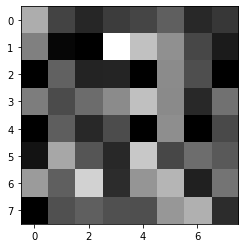

In [25]:
plt.imshow(example[0].reshape((8,8)), cmap="gray")


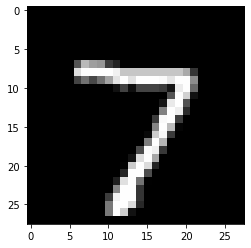

In [26]:
plt.imshow(x_test[0], cmap="gray")


This is a sample image from our dataset. New as it was uploaded.

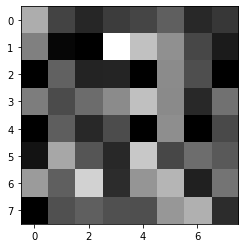

In [27]:
plt.imshow(example[0].reshape((8,8)), cmap="gray")


This is the encoded version of the same. Notice how our model has ommitted certain features that MAY be ineffective to our actual image.

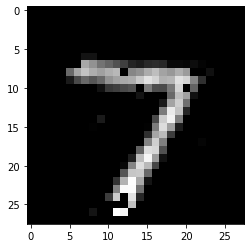

In [28]:
ae_out = autoencoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
img = ae_out[0].reshape(28,28)  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(img, cmap="gray")

The autoencoder model has decoded the previously encoded input. We have the desired output, but without unnecessary features in the data, which is a good thing!

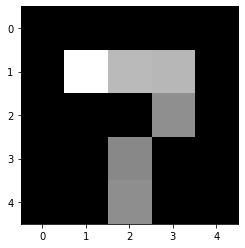

In [29]:
smaller = cv2.resize(x_test[0], (5,5))
back_to_original = cv2.resize(smaller, (28,28))
plt.imshow(smaller, cmap="gray")

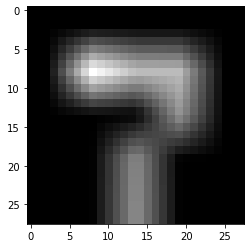

In [30]:
plt.imshow(back_to_original, cmap="gray")

We can see that, even after resizing the image from (8,8) to (5,5), our autoencoder still outputs the expected number. 